# Chapter 3, RV Generation

## Part 1, Generation of uniform(0,1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
np.random.uniform()

0.07388599392782225

pseudorandom numbers appear random but are actually from a deterministic sequence

In [3]:
np.random.uniform()

0.3513517598674639

Linear Congruential Generator. See: https://en.wikipedia.org/wiki/Linear_congruential_generator

Uniform (discrete on) $\{0,1,2,\ldots,2^{32}-1\}$

In [4]:
a = 1664525;
c = 1013904223;
m = 2**32;

$$
x_{n+1} = a x_n+c~~ \text{mod}~~ m
$$

Seed: $x_0$.

In [24]:
class LCG:
    def __init__(self, seed: int, a: int, c: int, m: int):
        self.X = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        self.X = (self.a * self.X + self.c) % self.m
        return self.X

    def random(self):
        return self.next()/self.m

In [25]:
lcg = LCG(seed = 42, a = 1664525, c = 1013904223, m = 2**32)

In [26]:
lcg.next()

1083814273

In [27]:
lcg.next()

378494188

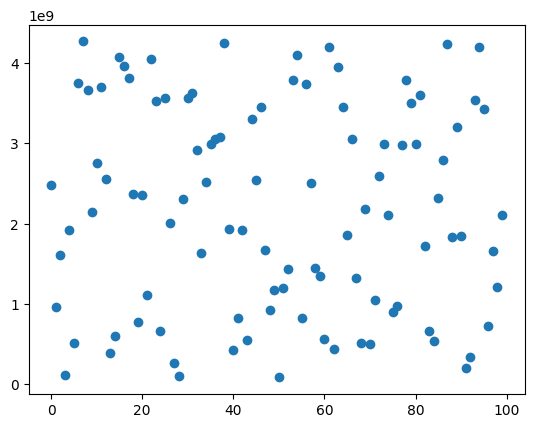

In [28]:
plt.scatter(range(100), [lcg.next() for _ in range(100)]);

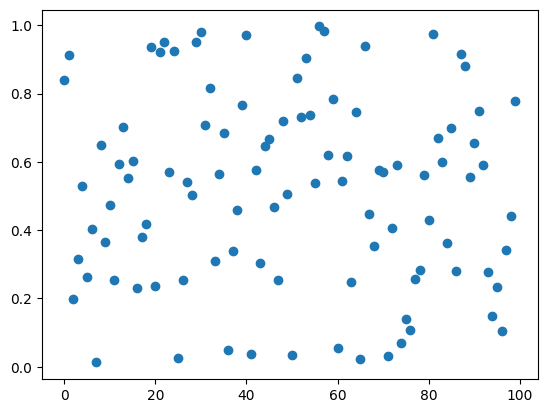

In [29]:
plt.scatter(range(100), [lcg.next()/(2**32) for _ in range(100)]);

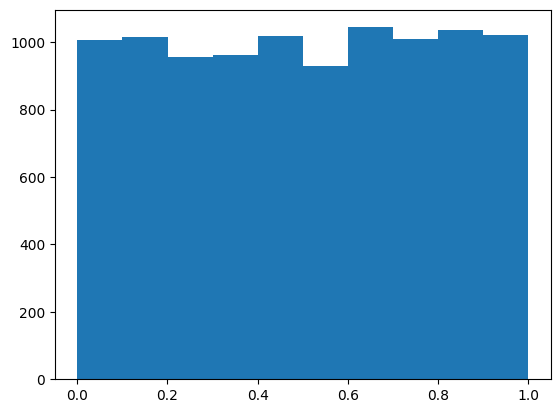

In [30]:
plt.hist([lcg.next()/(2**32) for _ in range(10**4)]);

## Part 2 (the main part), generation of everything else

## Inverse Probability Transform


You want to generate a random variable $X$ from a distribution that has CDF $F_X(x)$.

What you do is take $U \sim \text{uniform}(0,1)$.  And then you set $X = F_X^{-1}(U)$.

E.g. 

$$
F_X(x) = 
\begin{cases}
0 & \text{for}\quad x < 0\\
1-e^{-\lambda x} & \text{for} \quad x \ge 0
\end{cases}
$$

We saw before $F^{-1}_X(u) = -\frac{1}{\lambda}\log(1-u)$.  

In [36]:
# Wolrd made
# uni_rv = np.random.rand

# Home made
uni_rv = lcg.random 

In [37]:
def exp_rv(lam = 1.0):
    return -(1/lam)*math.log(uni_rv()) # did not do 1-lcg.random() because not needed

In [38]:
exp_rv()

0.7680827863719216

In [46]:
my_exps = [exp_rv(lam =1.5) for _ in range(10**4)]

In [47]:
def exp_pdf(x, lam = 1.0):
    if x >= 0:
        return lam * math.exp(-lam*x)
    return 0 #else

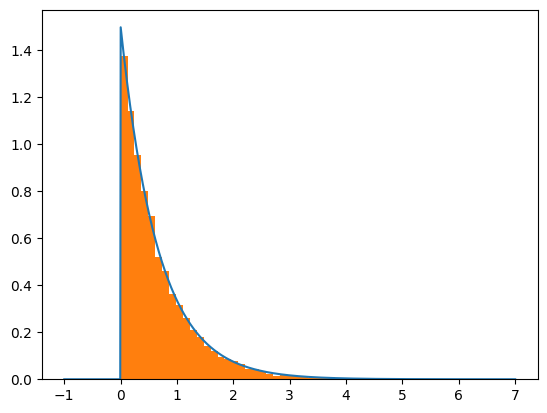

In [49]:
x_vals = np.linspace(-1, 7, 1000)
pdf_vals = [exp_pdf(x, lam = 1.5) for x in x_vals]
plt.plot(x_vals,pdf_vals)
plt.hist(my_exps, bins = 50, density = True);

# Acceptance Rejection Sampling

We want to generate from $f(x)$. It is hard.

We have a way to generate from $g(x)$ and it is easier.

Support of $g$ is at least as large as support of $f$.

We pick $C$ such that $f(x) \le C g(x)$ for all $x$.

Algorithm:
1. Generate X from $g(x)$.
2. Generate U, uniform(0,1).
3. Ouput X if $U \le \frac{f(X)}{Cg(X)}$  (Accepting).
   Otherwise (i.e. if $U > \frac{f(x)}{Cg(x)}$) return to step 1 (Rejecting).

In [50]:
def acccept_reject_rv(f, g, g_rv, C):
    while True:
        X = g_rv()
        U = uni_rv()
        if U <= f(X)/(C*g(X)):
            return X

Example on exp(1) truncated at $1$.

$$
f(x) = \frac{1}{1-e^{-1}} e^{-x}
$$
for $x \in [0,1]$ and $0$ otherwise

In [51]:
def target_exp_f(x):
    return math.exp(-x)/(1-1/math.e)

In [55]:
sum([target_exp_f(x)*0.001 for x in np.arange(0,1,0.001)]) #This is just a rough numerical check to see it is a valid pdf.

1.0005000833333333

# To continue here...